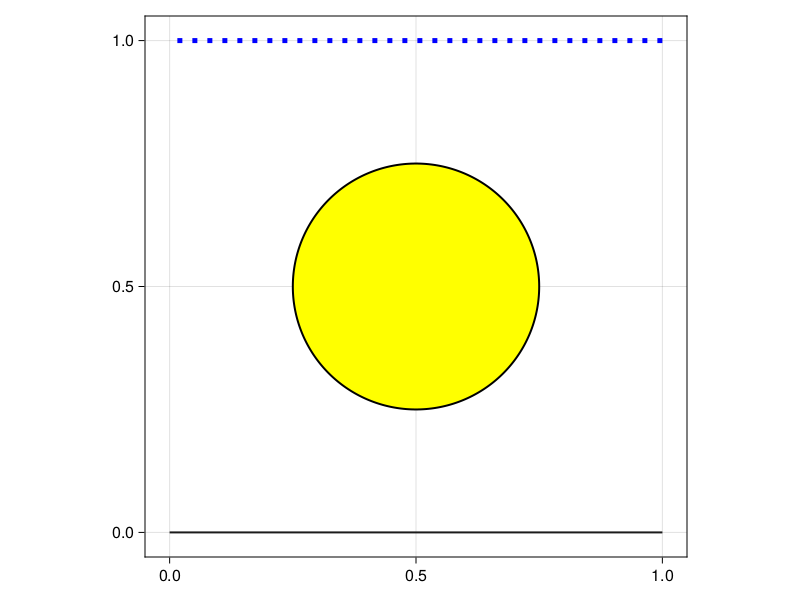

In [3]:
using DynamicalBilliards, InteractiveDynamics, CairoMakie

bd = billiard_sinai()

fig, ax = bdplot(bd[2])
bdplot!(ax, bd[4]; color = "blue", linestyle = :dot, linewidth = 5.0)
bdplot!(ax, bd[1]; color = "yellow", strokecolor = "black")
fig

In [ ]:
using DynamicalBilliards, InteractiveDynamics, CairoMakie

bd = billiard_mushroom()

n = 100 # how many particles to create
t = 200 # how long to evolve each one

bmap, arcs = parallelize(boundarymap, bd, t, n)

colors = [randomcolor() for i in 1:n] # random colors

fig, ax = bdplot_boundarymap(bmap, arcs, color = colors)
fig

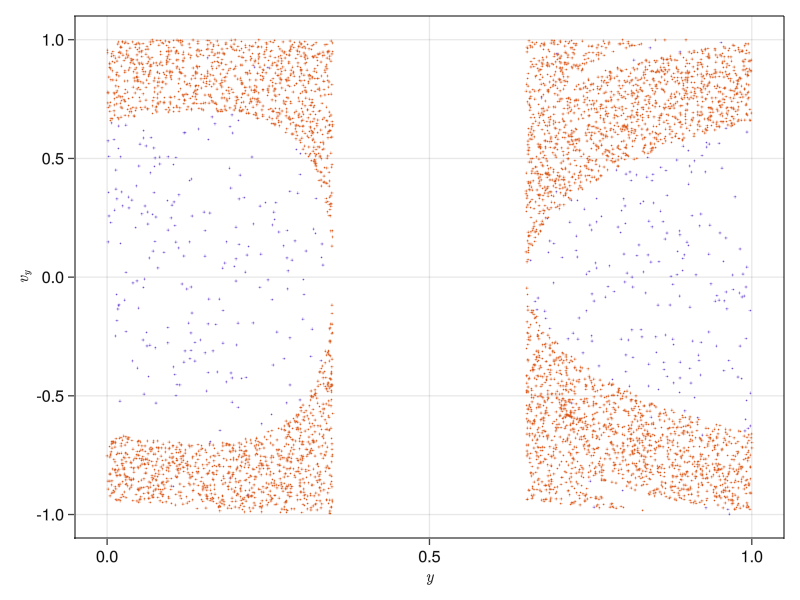

In [6]:
using DynamicalBilliards, CairoMakie
t = 100; r = 0.15
bd = billiard_sinai(r, setting = "periodic")

# the direction of the normal vector is IMPORTANT!!!
# (always keep in mind that ω > 0  means counter-clockwise rotation!)
plane = InfiniteWall([0.5, 0.0], [0.5, 1.0], [-1.0, 0.0])

posvector, velvector = psos(bd, plane, t, 1000, 2.0)
c(a) = length(a) == 1 ? "#6D44D0" : "#DA5210"

fig = Figure(); ax = Axis(fig[1,1]; xlabel = L"y", ylabel=L"v_y")

for i in 1:length(posvector)
    poss = posvector[i] # vector of positions
    vels = velvector[i] # vector of velocities at the section
    L = length(poss)
    if L > 0
        #plot y vs vy
        y = [a[2] for a in poss]
        vy = [a[2] for a in vels]
        scatter!(y, vy; color = c(y), markersize = 2)
    end
end
fig

In [2]:
using DynamicalBilliards, InteractiveDynamics, GLMakie
l, w, r = 0.5, 0.75, 1.0
bd = billiard_mushroom(l, w, r)
N = 20
ps = vcat(
    [MushroomTools.randomchaotic(l, w, r) for i in 1:N],
    [MushroomTools.randomregular(l, w, r) for i in 1:N],
)
colors = [i ≤ N ? RGBf(0.1, 0.4 + 0.3rand(), 0) : RGBf(0.4, 0, 0.6 + 0.4rand()) for i in 1:2N]
fig, phs, chs = bdplot_interactive(bd, ps;
    colors, plot_bmap = true, bmap_size = 8, tail_length = 2000,
);